In [1]:
# load the required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# read the dataset
# We are going to use the Age Blood Presure dataset
dataset = np.loadtxt("x03.txt")

Let`s visualize the dataset to have an intuition of the data distribution.

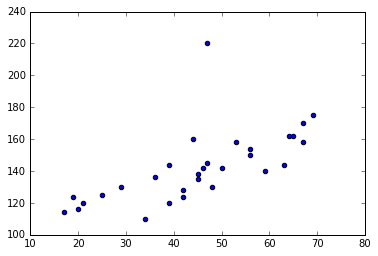

In [3]:
plt.scatter(dataset[:,2],dataset[:,3])

In order to find a line - (y = mx + b) - that best fits our dataset above, we are going to initialize a default line, and interactively update that line by using the gradient descent optimization algorithm.

In [4]:
initial_b = 1.
initial_m = 2.

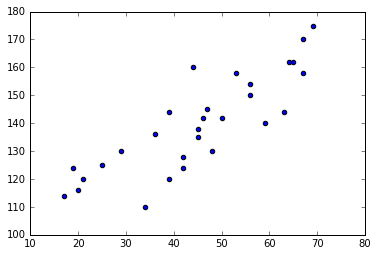

In [5]:
dataset = np.delete(dataset, 1, 0)
plt.scatter(dataset[:,2], dataset[:,3])

In [6]:
# we are going to train a model that predicts a blood pressure value based on some age 
xs = dataset[:,2]
ys = dataset[:,3]

Now, to evaluate how wrong our initial default value is from the desired line, let's calculate the error from every point in the dataset to the initial default line, sum them up and take the average.

In [7]:
def compute_error_for_line_given_points(slope, y_intercept, dataset):
    total_error = 0.0
    N = len(dataset)
    for i in range(N):
        x = dataset[i,2]
        y = dataset[i,3]
        total_error += (y - (slope * x + y_intercept)) ** 2
    
    return total_error / N

In [8]:
error = compute_error_for_line_given_points(initial_m, initial_b, dataset)
print "Initial error:", error


Initial error: 2717.27586207


In [9]:
def gradient_step(current_b, current_m, dataset, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(dataset))
    for i in range(len(dataset)):
        x = dataset[i,2]
        y = dataset[i,3]
    
        # calculate partial derivatives with respect to b and m
        # and move in their direction
        b_gradient += -(2/N) * (y - (current_m * x) - current_b)
        m_gradient += -(2/N) * x * (y - (current_m * x) - current_b)
    
    new_b = current_b - learning_rate * b_gradient
    new_m = current_m - learning_rate * m_gradient

    return new_b, new_m


In [100]:
b = initial_b
m = initial_m
learning_rate = 0.000441

# training loop
for step in range(50000):
    b, m = gradient_step(b, m, dataset, learning_rate)
    

In [101]:
print "Learned line: y = ", m, "x + ", b 
print "Error:", compute_error_for_line_given_points(m, b, dataset)

Learned line: y =  0.969515339209 x +  96.0623147388
Error: 85.2561700985


In [102]:
def predict(x):
    return m * x + b

17.0 112.544075505
69.0 162.958873144


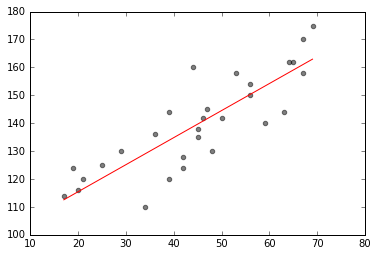

In [103]:
x1 = np.min(xs)
y1 = np.min(ys)
x2 = np.max(xs)
y2 = np.max(ys)

min_y = predict(x1)
max_y = predict(x2)

print x1, min_y
print x2, max_y

plt.figure()
plt.scatter(xs, ys, color = 'k', alpha=0.5)
plt.plot([x1, x2], [min_y, max_y], 'k-', color = 'r')
plt.show()